In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [137]:
## import data
data=np.loadtxt('tests_new/potential.txt',skiprows=1)

In [138]:
## set up variables
xr=(data[:,0]) #A
yr=(data[:,1]) #A
zr=(data[:,2]) #A
radius=np.sqrt(xr**2+yr**2+zr**2)
dists=data[:,3]
energy=data[:,4]


## average in a certain ragion
dists_avg=[]
energy_avg=[]
step=0.02
x=np.arange(int(np.min(radius)),int(np.max(radius)+0.5),step)

for i in x:
    if len(dists[(radius>=i)*(radius<(i+step))])>0:
        dists_avg.append(np.median(dists[(radius>=i)*(radius<(i+step))]))
        energy_avg.append(np.median(energy[(radius>=i)*(radius<(i+step))]))
    else:
        dists_avg.append(np.nan)
        energy_avg.append(np.nan)

energy_avg=np.array(energy_avg)
dists_avg=np.array(dists_avg)

## set up fits
(xlimen,xlimdist)=(0.2,0.2)
enpars=np.polyfit(x[np.abs(x)<=xlimen],energy_avg[np.abs(x)<=xlimen],2)
distpars=np.polyfit(x[np.abs(x)<=xlimdist],dists_avg[np.abs(x)<=xlimdist],2)
p_en = np.poly1d(enpars)
p_dist = np.poly1d(distpars)



Using matplotlib backend: TkAgg


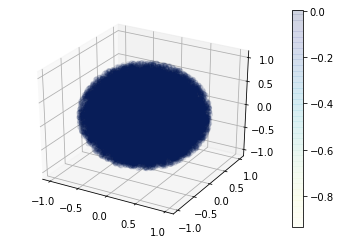

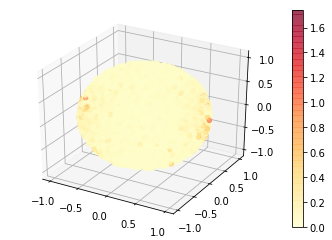

In [304]:
## 3D plot of rawdata
(xlimen,xlimdist)=(1,1)

%matplotlib auto
fig = plt.figure()
colormap='YlGnBu'
ax = fig.add_subplot(111, projection='3d')
#distplt=dists-np.min(dists)
#distplt=distplt/np.max(distplt)*100
p=ax.scatter(xr[radius<=xlimdist],yr[radius<=xlimdist],zr[radius<=xlimdist],c=dists[radius<=xlimdist],cmap=colormap,alpha=0.1)
plt.colorbar(p)
plt.show()

fig = plt.figure()
colormap='YlOrRd'
ax = fig.add_subplot(111, projection='3d')
#enplt=energy-np.min(energy)
#enplt=enplt/np.max(enplt)*100
p=ax.scatter(xr[radius<=xlimen],yr[radius<=xlimen],zr[radius<=xlimen],c=energy[radius<=xlimen],cmap=colormap,alpha=0.5)
cb=plt.colorbar(p)
#cb.set_clim(-0.0001,0.01)
plt.show()

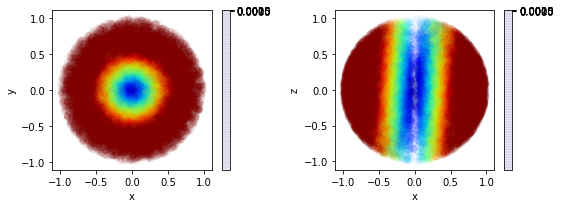

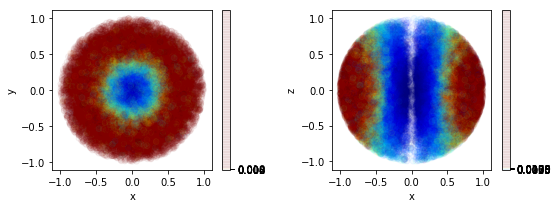

In [305]:
## 2D projected plots
%matplotlib inline
tags=[dists,energy]
colors=['jet','jet']
lims=[[(0,0.002),(0,0.002)],[(-0.0005,0.01),(0,0.02)]]

for j in range(2):
    f,ax=plt.subplots(1,2,figsize=(8,3))
    signs=(xr+yr)
    bisigns=np.ones(signs.shape)
    bisigns[signs<0]=-1
    x_ax=[xr,np.sqrt((xr**2+yr**2))*bisigns]
    proj=[yr,zr]
    axs=['y','z']
    for i in range(2):
        sp=ax[i].scatter(x_ax[i][radius<=xlimdist],proj[i][radius<=xlimdist],c=tags[j][radius<=xlimdist],
                         cmap=colors[j],alpha=0.05)
        ax[i].set_aspect('equal')
        ax[i].set_xlabel('x')
        ax[i].set_ylabel(axs[i])
        cb=fig.colorbar(sp, ax=ax[i])
        cb.set_clim(lims[j][i])
    plt.tight_layout()
    plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """
/home/christoph/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/christoph/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


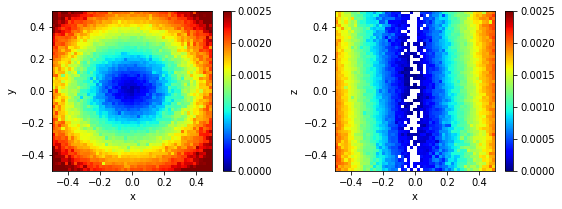

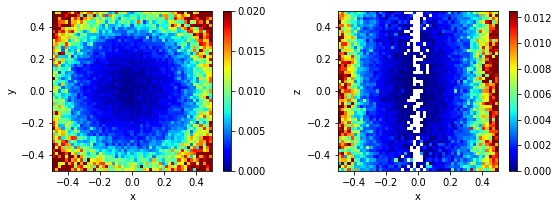

In [308]:
## averaged 2D projected plots
(xlimen,xlimdist)=(0.5,0.5)

step=0.02 #A
xmesh=np.linspace(-xlimen,xlimen,(2*xlimen)/step+1)
mesh=np.meshgrid(xmesh,xmesh)

## calc in-plane distance

signs=(xr+yr)
bisigns=np.ones(signs.shape)
bisigns[signs<0]=-1

## set up axis for loop
x_ax=[xr,np.sqrt((xr**2+yr**2))*bisigns]
proj=[yr,zr]
axs=['y','z']
dists_avg_xy=np.zeros(mesh[0].shape)
dists_avg_xz=np.zeros(mesh[0].shape)
en_avg_xy=np.zeros(mesh[0].shape)
en_avg_xz=np.zeros(mesh[0].shape)

tags_dist=[dists_avg_xy,dists_avg_xz]
tags_en=[en_avg_xy,en_avg_xz]
tags=[tags_dist,tags_en]

values=[dists,energy]
## average in a certain ragion
for h in range(2):
    for k in range(2):
        for i in range(mesh[0].shape[0]):
            for j in range(mesh[0].shape[1]):
                xradius=mesh[0][j,i]
                yradius=mesh[1][j,i]
                tags[h][k][j,i]=np.median(values[h][(x_ax[k]>=xradius)*(x_ax[k]<xradius+step)*(proj[k]>=yradius)*(proj[k]<yradius+step)])



%matplotlib inline
colors=['jet','jet']
lims=[[(0,0.0025),(0,0.0025)],[(0,0.02),(0,0.0125)]]

for j in range(2):
    f,ax=plt.subplots(1,2,figsize=(8,3))
    signs=(xr+yr)
    bisigns=np.ones(signs.shape)
    bisigns[signs<0]=-1
    x_ax=[xr,np.sqrt((xr**2+yr**2))*bisigns]
    proj=[yr,zr]
    axs=['y','z']
    for i in range(2):
        sp=ax[i].imshow(tags[j][i],extent=[-xlimen,xlimen,-xlimen,xlimen],cmap=colors[j],interpolation='nearest')
        ax[i].set_aspect('equal')
        ax[i].set_xlabel('x')
        ax[i].set_ylabel(axs[i])
        cb=fig.colorbar(sp, ax=ax[i])
        cb.set_clim(lims[j][i])
        cb.draw_all() 
    plt.tight_layout()
    plt.show()

In [51]:
## set up plots of rawdata

plt.plot(radius,energy,'ro',alpha=0.1)
plt.plot(radius,dists,'bo',alpha=0.1)
plt.plot(x,p_en(x),'r--')
plt.plot(x,p_dist(x),'b--')
#plt.xlim(-0.25,0.25)
#plt.ylim(-0.00001,0.0001)
plt.show()

In [50]:
## set up plots of mediands

plt.plot(x,dists_avg,'bo')
plt.plot(x,distpars[0]*x**2+distpars[1]*x+distpars[2],'b--')

plt.plot(x,energy_avg,'ro')
plt.plot(x,enpars[0]*x**2+enpars[1]*x+enpars[2],'r--')

plt.ylim(-0.000,0.0002)
plt.xlim(-0.25,0.25)
plt.show()

print('poly-fit of energies:\t'+str(enpars))
print('root at '+str(-enpars[1]/(2*enpars[0])))
print('poly-fit of distances:\t'+str(distpars))
print('root at '+str(-distpars[1]/(2*distpars[0])))
print('dist/energy:\t'+str(round(distpars[0]/enpars[0],3)))

poly-fit of energies:	[nan nan nan]
root at nan
poly-fit of distances:	[nan nan nan]
root at nan
dist/energy:	nan


In [252]:
print(mesh[0])
print(mesh[1])

[[-0.5  -0.48 -0.46 ...  0.46  0.48  0.5 ]
 [-0.5  -0.48 -0.46 ...  0.46  0.48  0.5 ]
 [-0.5  -0.48 -0.46 ...  0.46  0.48  0.5 ]
 ...
 [-0.5  -0.48 -0.46 ...  0.46  0.48  0.5 ]
 [-0.5  -0.48 -0.46 ...  0.46  0.48  0.5 ]
 [-0.5  -0.48 -0.46 ...  0.46  0.48  0.5 ]]
[[-0.5  -0.5  -0.5  ... -0.5  -0.5  -0.5 ]
 [-0.48 -0.48 -0.48 ... -0.48 -0.48 -0.48]
 [-0.46 -0.46 -0.46 ... -0.46 -0.46 -0.46]
 ...
 [ 0.46  0.46  0.46 ...  0.46  0.46  0.46]
 [ 0.48  0.48  0.48 ...  0.48  0.48  0.48]
 [ 0.5   0.5   0.5  ...  0.5   0.5   0.5 ]]


In [273]:
zr

array([ 0.23342461,  0.39515497,  0.38895795, ..., -0.38693338,
       -0.27006757,  0.43484584])

In [101]:
plt.hist(energy[radius<=xlimen],100)
plt.xlim(-0.001,0.01)
plt.show()